# Exponential Smoothing

In [1]:
# Packages
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import sys
import os
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
new_path = os.path.join(os.path.dirname(current_dir), '../Source')
print(new_path)
sys.path.append(new_path)
from Exponential_Smoothing_Forecast_Functions import *


c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\Fixed_Test_Set_Diagnostics
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source


## Load data

In [2]:
# Read excel in Fixed_Test_Set.xlsx
df = pd.read_excel('Fixed_Test_Set.xlsx')
df

,Date,Broken Machines,Total Machines,Percent Broken,Revenue Losses,7DMA,Outlier,Outlier 7DMA,Train
0,2020-10-25,354.0,6818.0,5.192138,221250.0,NaN,False,NaN,True
1,2020-10-26,373.0,6844.0,5.450029,233125.0,NaN,False,NaN,True
2,2020-10-27,427.0,7488.0,5.702457,266875.0,NaN,False,NaN,True
3,2020-10-28,391.0,8294.0,4.714251,244375.0,NaN,False,NaN,True
4,2020-10-29,374.0,7461.0,5.012733,233750.0,NaN,False,NaN,True
...,...,...,...,...,...,...,...,...,...
1577,2025-02-18,1359.0,11832.0,11.485801,849375.0,11687.571429,False,11671.714286,False
1578,2025-02-19,1190.0,11835.0,10.054922,743750.0,11716.000000,False,11671.714286,False
1579,2025-02-20,1207.0,11990.0,10.066722,754375.0,11756.428571,False,11671.714286,False
1580,2025-02-21,1110.0,11907.0,9.322247,693750.0,11824.857143,False,11671.714286,False


## Exponential Smoothing

In [3]:
# Train/test split
train_df = df.query('Train == 1').reset_index(drop=True)
test_df = df.query('Train == 0').reset_index(drop=True)
print(len(train_df), len(test_df))

1552 30


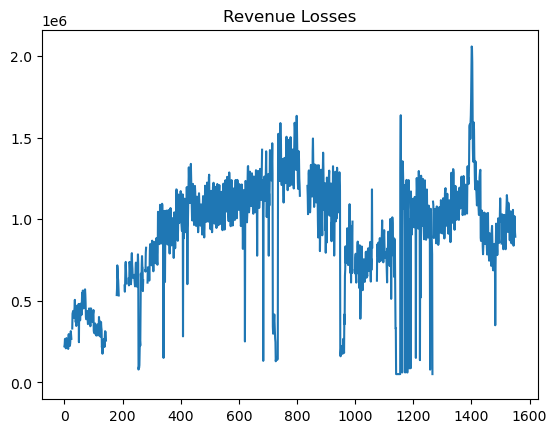

In [4]:
# Check train_df series
plt.plot(train_df['Revenue Losses'])
plt.title('Revenue Losses')
plt.show()

In [5]:
# Run exponential_smoothing_forecast on train_df
fit_hw, forecast_df, orig_df = exponential_smoothing_forecast(train_df)
forecast_values = forecast_df['yhat']
lower_series = forecast_df['yhat_lower']
upper_series = forecast_df['yhat_upper']

c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\Exponential_Smoothing_Forecast_Functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_missing['Revenue Losses'], lam = stats.boxcox(no_out_missing['Revenue Losses'])
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages

In [6]:
# Check residuals
def plot_exponential_smoothing_residuals(fit, lags=10, bins=20):
    """
    Generates and displays a suite of residual plots for Exponential Smoothing.

    Args:
        fit: The fitted ExponentialSmoothing model object.
        lags: Number of lags to plot in the ACF.
        bins: Number of bins for the histogram.
    """

    residuals = fit.resid
    fitted_values = fit.fittedvalues

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns of plots

    # 1. Time Series Plot of Residuals
    axes[0, 0].plot(residuals)
    axes[0, 0].set_title('Residuals over Time')
    axes[0, 0].set_xlabel('Date')  # Or time index
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].grid(True)

    # 2. Histogram of Residuals
    axes[0, 1].hist(residuals, bins=bins)
    axes[0, 1].set_title('Histogram of Residuals')
    axes[0, 1].set_xlabel('Residuals')
    axes[0, 1].set_ylabel('Frequency')

    # 3. Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot of Residuals')

    # 4. ACF Plot
    plot_acf(residuals, lags=lags, ax=axes[1, 1])  # Use the provided axes
    axes[1, 1].set_title('Autocorrelation Function (ACF)')

    # 5. Residuals vs. Fitted Values
    axes[2, 0].scatter(fitted_values, residuals)
    axes[2, 0].set_title('Residuals vs. Fitted Values')
    axes[2, 0].set_xlabel('Fitted Values')
    axes[2, 0].set_ylabel('Residuals')
    axes[2, 0].grid(True)

    # Remove the empty subplot if needed
    fig.delaxes(axes[2,1]) # if you don't want the 6th plot.

    plt.tight_layout()  # Adjust subplot params for a tight layout
    plt.show()

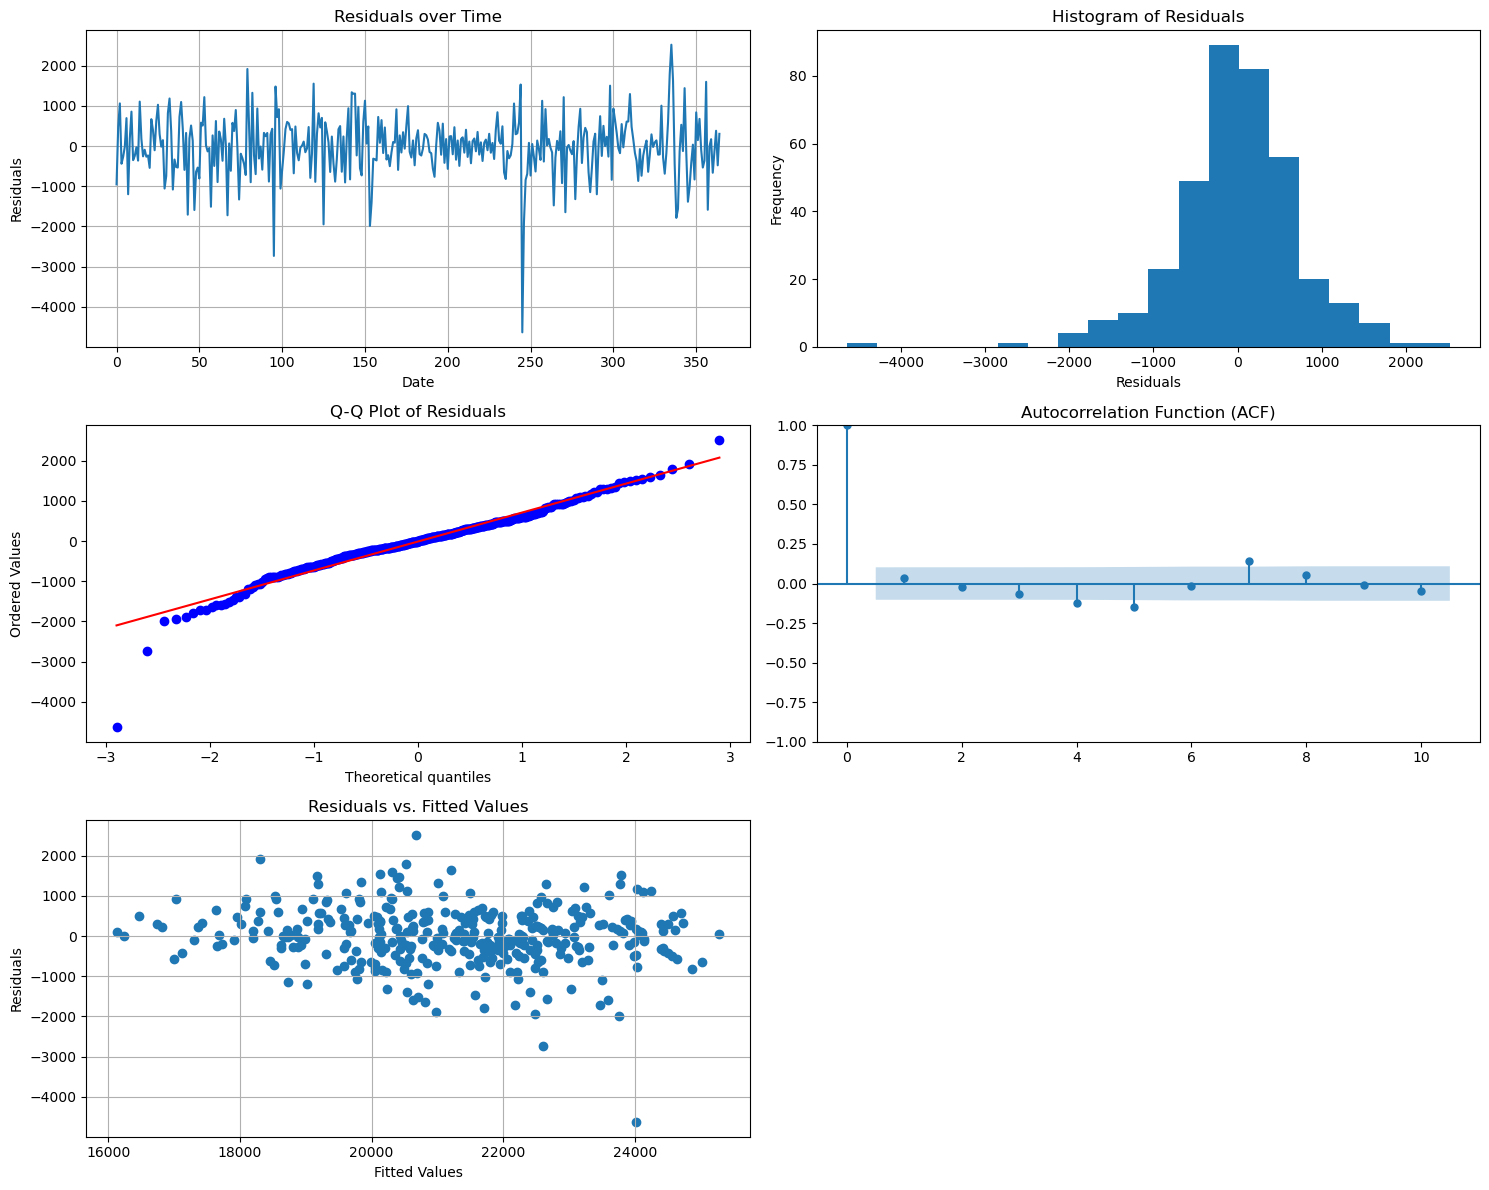

In [7]:
plot_exponential_smoothing_residuals(fit_hw)

In [8]:
# For plotting that follows, make orig_df orig_df plus test_df
orig_df = pd.concat([orig_df, test_df])


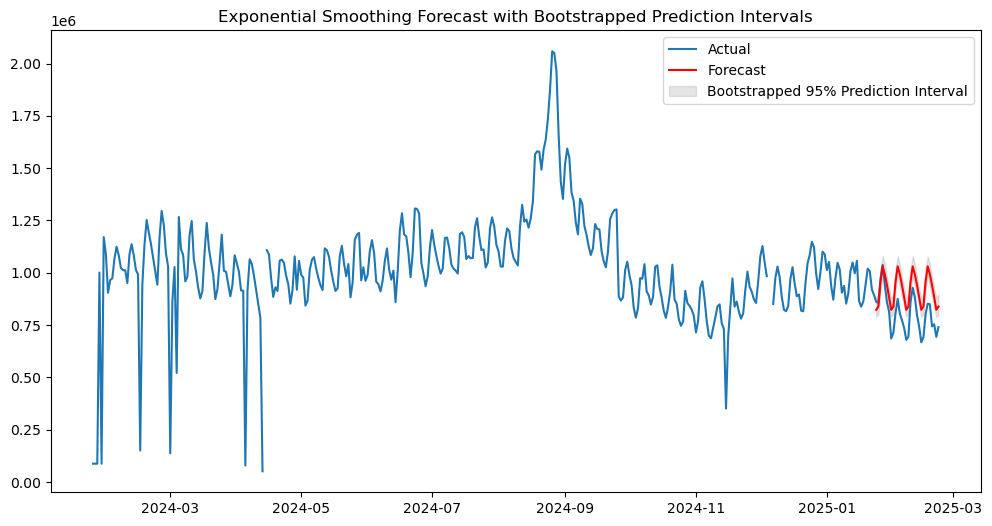

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orig_df['Date'], orig_df['Revenue Losses'], label='Actual')
plt.plot(test_df['Date'], forecast_df['yhat'], label='Forecast', color='red')  # Original forecast

plt.fill_between(test_df['Date'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='gray', alpha=0.2, label=f'Bootstrapped 95% Prediction Interval')

plt.title('Exponential Smoothing Forecast with Bootstrapped Prediction Intervals')
plt.legend()
plt.show()

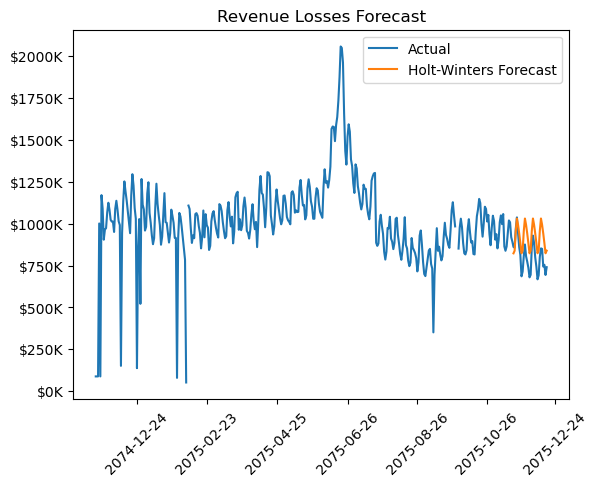

MAE: 118833.67578193592
RMSE: 129145.36465626482


In [10]:
plt.plot(orig_df['Date'], orig_df['Revenue Losses'], label="Actual")
plt.plot(test_df['Date'], forecast_df['yhat'], label="Holt-Winters Forecast")
# Title of Revenue Losses Forecast
plt.title('Revenue Losses Forecast')
# Format y axis as thousands of dollars
plt.gca().yaxis.set_major_formatter((lambda x, _: f'${int(x/1000)}K'))
# Format x axis as dates - add x number of days to first date in data, format as date
plt.gca().xaxis.set_major_formatter((lambda x, _: (df['Date'][0] + pd.DateOffset(days=int(x))).strftime('%Y-%m-%d')))
# Rotate x axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Check MAE, RMSE on test set
mae = mean_absolute_error(test_df['Revenue Losses'], forecast_df['yhat'])
rmse = root_mean_squared_error(test_df['Revenue Losses'], forecast_df['yhat'])
print('MAE:', mae)
print('RMSE:', rmse)

Kind of limited in terms of what more can be done here ... more complex forecasting methods may be a better fit for this data (in particular, I think better accounting for cycles or more recent change in trend may be very useful).